<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use("fivethirtyeight")

In [27]:
data = pd.read_csv("powerproduction.csv")
data.sample(10)

,speed,power
257,12.863,47.787
321,16.366,88.042
435,21.922,104.052
451,22.723,93.964
231,11.787,36.787
243,12.337,47.282
31,1.301,0.000
401,19.945,99.472
180,9.209,11.120
22,0.976,2.064


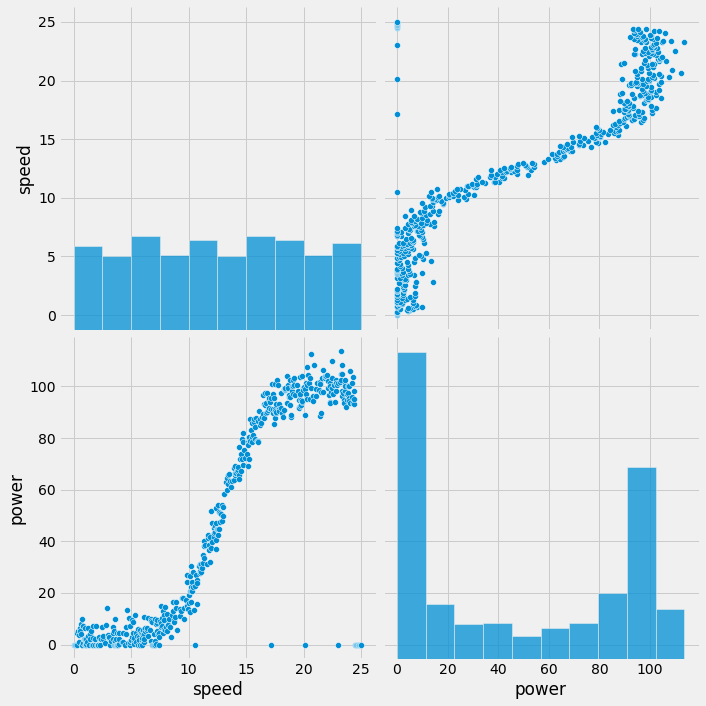

In [3]:
sns.pairplot(data, height=5)
plt.show()

In [4]:
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [5]:
# Decision tree regression

# Get data
x = data['speed'].values.reshape(-1,1)
y = data['power'].values.reshape(-1,1)

# Sort X and y by ascending values of X
sort_idx = x.flatten().argsort()                 
x = x[sort_idx]
y = y[sort_idx]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)


# Initialize and fit regressor
#tree = DecisionTreeRegressor(criterion='mse', max_depth=4)         
#tree.fit(x, y)

# Fitting Decision Tree Regression to the dataset
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

Decision Trees:
https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda
https://dev.to/nexttech/classification-and-regression-analysis-with-decision-trees-jgp

In [6]:
#Prediciton
y_pred = tree_model.predict(x_test)

# Checking accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  # very sensitive to outlliers 
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.393420000000001
Mean Squared Error: 29.236074940000012
R-squared: 0.9822383586563229


Using pickle to export model:
https://medium.com/techcrush/how-to-deploy-your-ml-model-in-jupyter-notebook-to-your-flask-app-d1c4933b29b5

In [7]:
import pickle

filename = "model.pkl"

pickle.dump(tree_model, open(filename, "wb"))

In [12]:
tree_model.predict([[10.2]])

array([20.704])

In [29]:
# Format input for prediction
x = 10
y = np.array(x).reshape(-1,1)

tree_model.predict(y)

array([19.354])